In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

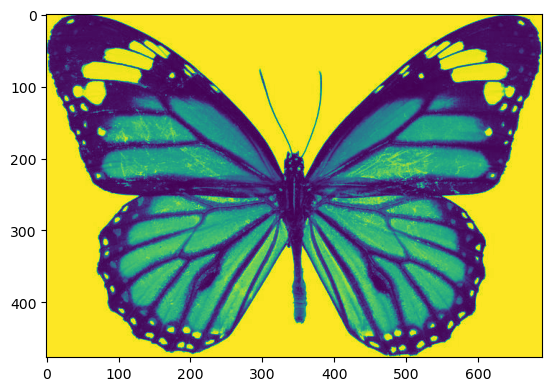

In [33]:
img = cv2.imread("Butterfly.jpg", 0).astype('float64') 
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img)
plt.show()

## Roberts 

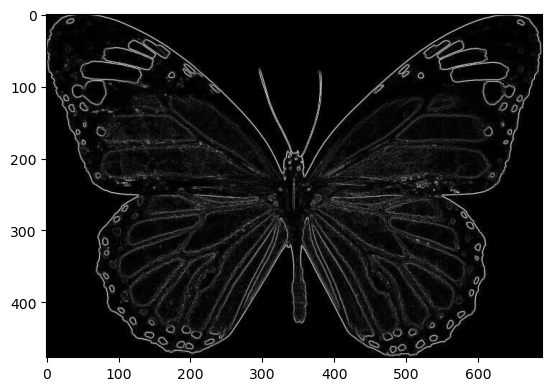

In [15]:
import numpy as np 
from scipy import ndimage 

roberts_cross_v = np.array( [[1, 0 ], [0,-1 ]] ) 

roberts_cross_h = np.array( [[ 0, 1 ], [ -1, 0 ]] ) 

img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v ) 
horizontal = ndimage.convolve( img, roberts_cross_h ) 

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical)) 
edged_img*=255
plt.imshow(edged_img, cmap = "gray")


## Sobel

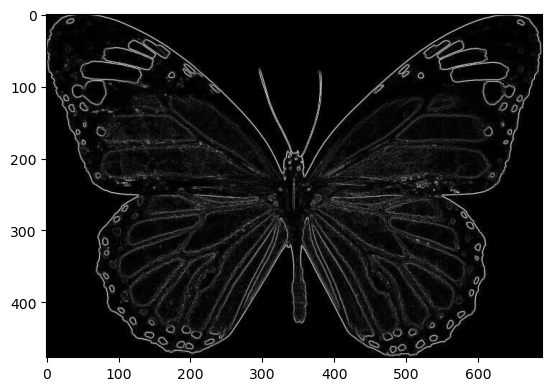

In [16]:
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
grad = np.sqrt(grad_x**2 + grad_y**2)
grad_norm = (grad * 255 / grad.max()).astype(np.uint8)
plt.imshow(edged_img, cmap = "gray")

## Prewitt 

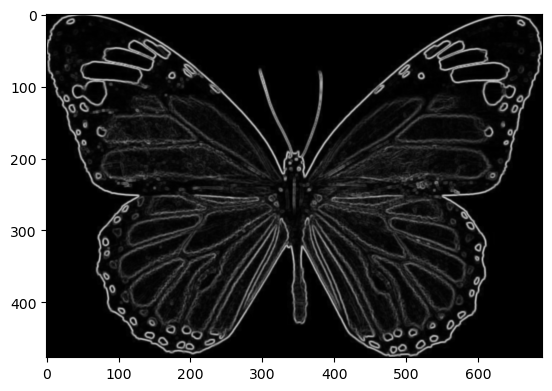

In [19]:
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

pre_x = ndimage.convolve(img, Hx) / 6.0
pre_y = ndimage.convolve(img, Hy) / 6.0


pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
pre_out = (pre_out / np.max(pre_out)) * 255

plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

##  Laplacian

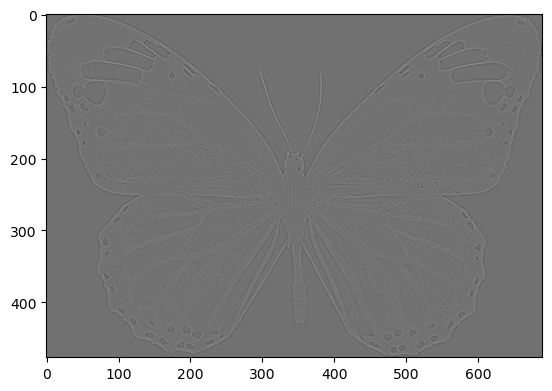

In [23]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray',interpolation = 'bicubic')
plt.show()

## Canny

<Figure size 640x480 with 0 Axes>

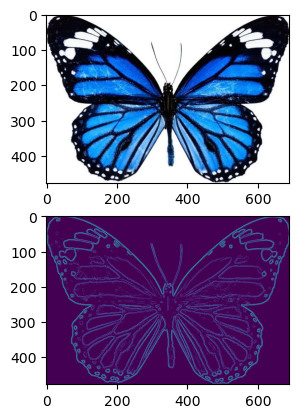

In [36]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 


# defining the canny detector function 

# here weak_th and strong_th are thresholds for 
# double thresholding step 
def Canny_detector(img, weak_th = None, strong_th = None): 
	
	# conversion of image to grayscale 
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
	
	# Noise reduction step 
	img = cv2.GaussianBlur(img, (5, 5), 1.4) 
	
	# Calculating the gradients 
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
	
	# Conversion of Cartesian coordinates to polar 
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
	
	# setting the minimum and maximum thresholds 
	# for double thresholding 
	mag_max = np.max(mag) 
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5
	
	# getting the dimensions of the input image 
	height, width = img.shape 
	
	# Looping through every pixel of the grayscale 
	# image 
	for i_x in range(width): 
		for i_y in range(height): 
			
			grad_ang = ang[i_y, i_x] 
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
			
			# selecting the neighbours of the target pixel 
			# according to the gradient direction 
			# In the x axis direction 
			if grad_ang<= 22.5: 
				neighb_1_x, neighb_1_y = i_x-1, i_y 
				neighb_2_x, neighb_2_y = i_x + 1, i_y 
			
			# top right (diagonal-1) direction 
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction 
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagonal-2) direction 
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle 
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
				neighb_1_x, neighb_1_y = i_x-1, i_y 
				neighb_2_x, neighb_2_y = i_x + 1, i_y 
			
			# Non-maximum suppression step 
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img) 
	strong_ids = np.zeros_like(img)			 
	ids = np.zeros_like(img) 
	
	# double thresholding step 
	for i_x in range(width): 
		for i_y in range(height): 
			
			grad_mag = mag[i_y, i_x] 
			
			if grad_mag<weak_th: 
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th: 
				ids[i_y, i_x]= 1
			else: 
				ids[i_y, i_x]= 2
	
	
	# finally returning the magnitude of 
	# gradients of edges 
	return mag 

frame = cv2.imread("Butterfly.jpg")

# calling the designed function for 
# finding edges 
canny_img = Canny_detector(frame) 

# Displaying the input and output image 
plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame) 
plots[1].imshow(canny_img) 


## img2

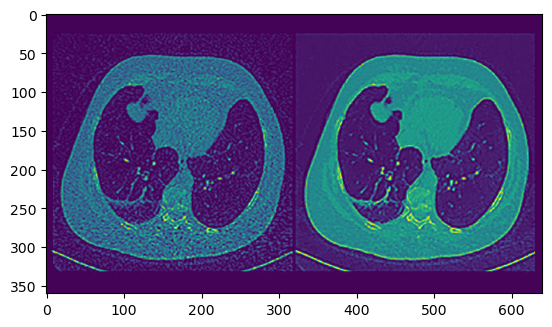

In [38]:
img = cv2.imread("med.jpg", 0).astype('float64') 
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img)
plt.show()

## Roberts

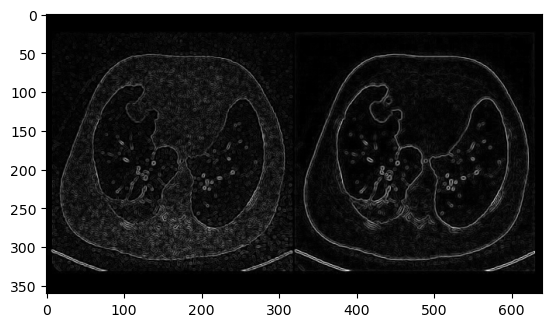

In [39]:
import numpy as np 
from scipy import ndimage 

roberts_cross_v = np.array( [[1, 0 ], [0,-1 ]] ) 

roberts_cross_h = np.array( [[ 0, 1 ], [ -1, 0 ]] ) 

img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v ) 
horizontal = ndimage.convolve( img, roberts_cross_h ) 

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical)) 
edged_img*=255
plt.imshow(edged_img, cmap = "gray")


## Sobel

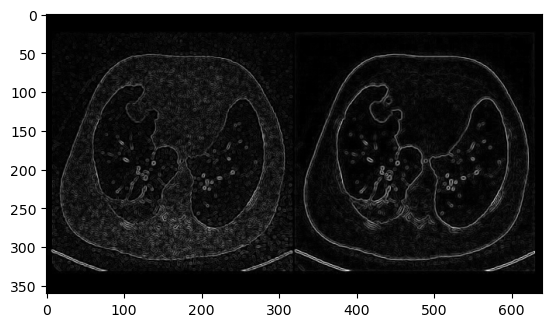

In [40]:
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
grad = np.sqrt(grad_x**2 + grad_y**2)
grad_norm = (grad * 255 / grad.max()).astype(np.uint8)
plt.imshow(edged_img, cmap = "gray")

## prewitt

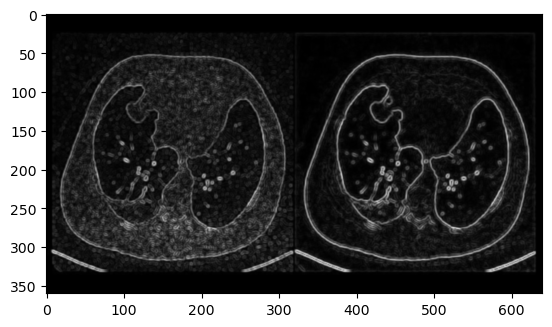

In [41]:
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

pre_x = ndimage.convolve(img, Hx) / 6.0
pre_y = ndimage.convolve(img, Hy) / 6.0


pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
pre_out = (pre_out / np.max(pre_out)) * 255

plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

## Laplacian

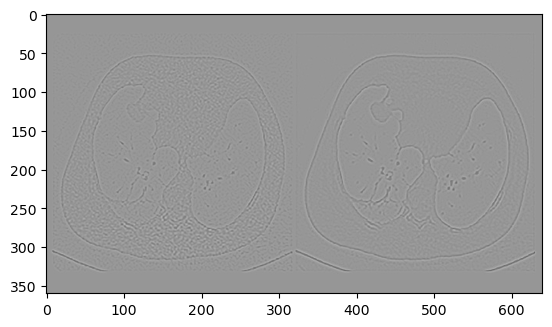

In [42]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray',interpolation = 'bicubic')
plt.show()

## Canny

<Figure size 640x480 with 0 Axes>

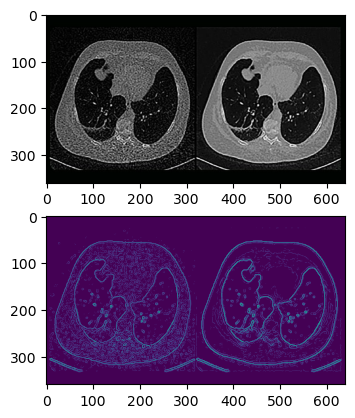

In [43]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 


# defining the canny detector function 

# here weak_th and strong_th are thresholds for 
# double thresholding step 
def Canny_detector(img, weak_th = None, strong_th = None): 
	
	# conversion of image to grayscale 
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
	
	# Noise reduction step 
	img = cv2.GaussianBlur(img, (5, 5), 1.4) 
	
	# Calculating the gradients 
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
	
	# Conversion of Cartesian coordinates to polar 
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
	
	# setting the minimum and maximum thresholds 
	# for double thresholding 
	mag_max = np.max(mag) 
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5
	
	# getting the dimensions of the input image 
	height, width = img.shape 
	
	# Looping through every pixel of the grayscale 
	# image 
	for i_x in range(width): 
		for i_y in range(height): 
			
			grad_ang = ang[i_y, i_x] 
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
			
			# selecting the neighbours of the target pixel 
			# according to the gradient direction 
			# In the x axis direction 
			if grad_ang<= 22.5: 
				neighb_1_x, neighb_1_y = i_x-1, i_y 
				neighb_2_x, neighb_2_y = i_x + 1, i_y 
			
			# top right (diagonal-1) direction 
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction 
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagonal-2) direction 
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle 
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
				neighb_1_x, neighb_1_y = i_x-1, i_y 
				neighb_2_x, neighb_2_y = i_x + 1, i_y 
			
			# Non-maximum suppression step 
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img) 
	strong_ids = np.zeros_like(img)			 
	ids = np.zeros_like(img) 
	
	# double thresholding step 
	for i_x in range(width): 
		for i_y in range(height): 
			
			grad_mag = mag[i_y, i_x] 
			
			if grad_mag<weak_th: 
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th: 
				ids[i_y, i_x]= 1
			else: 
				ids[i_y, i_x]= 2
	
	
	# finally returning the magnitude of 
	# gradients of edges 
	return mag 

frame = cv2.imread("med.jpg")

# calling the designed function for 
# finding edges 
canny_img = Canny_detector(frame) 

# Displaying the input and output image 
plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame) 
plots[1].imshow(canny_img) 
